## Classification Tree

In [55]:
# before model building 
import pandas as pd 
import numpy as np
df=pd.read_csv('/Users/hexiaoyu/Desktop/Courses/INSY- DATA MINING/Adult.csv')
df.dtypes

income            object
race              object
sex               object
workclass         object
marital-status    object
age                int64
education-num      int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

In [56]:
df=pd.get_dummies(df,columns = ['race','sex','workclass','marital-status'])
df['income']=df['income'].apply(lambda x: 1 if x=="<=50K." else 0)


In [57]:
# construct variables
X=df.iloc[:,1:]
y=df['income']

In [58]:
# split training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=5)

In [59]:
# Build a tree model with 3 layers
from sklearn.tree import DecisionTreeClassifier
### Type your code here ###
ct = DecisionTreeClassifier(max_depth=3)
model = ct.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
from sklearn.metrics import precision_score
precision_ct = precision_score(y_test, y_test_pred)
precision_ct

np.float64(0.8560173026417426)

In [60]:
# Finding optimal max_depth
from sklearn.model_selection import cross_validate
### Type your code here ###
for i in range (2,21):
    model = DecisionTreeClassifier(max_depth=i)
    scores = cross_validate(model, X, y, scoring='precision', cv=5)
    print(i,':',np.average(scores['test_score']))

2 : 0.839663852626772
3 : 0.8556986634891534
4 : 0.8619748249102084
5 : 0.8583129695102578
6 : 0.8657465338637916
7 : 0.8645928822424663
8 : 0.8640826757410192
9 : 0.8673640487222671
10 : 0.8699148319524141
11 : 0.8744814776644516
12 : 0.8784931791687528
13 : 0.8849198188603156
14 : 0.8827541690247072
15 : 0.8763869479611122
16 : 0.8788202784040129
17 : 0.8750855320340818
18 : 0.8782306596140165
19 : 0.8786022559831009
20 : 0.8798206142477862


In [63]:
# the 13th depth give us the highest precision score, but it may lead to overfitting issues, and too complex to explain. 
# make prediction use new dataset 
df_test= pd.read_csv('/Users/hexiaoyu/Downloads/Sample_Data_from_Adult_Dataset.csv')
# One-hot encode test data with the same columns as training data
df_test = pd.get_dummies(df_test, columns=['race', 'sex', 'workclass', 'marital-status'])
df_test = df_test.reindex(columns=df.columns, fill_value=0)

x = df_test.drop('income', axis=1)

In [64]:
#make predictions
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred_1 = model.predict(x)
print(y_pred_1)

[1 1 1 1 1]


In [67]:
# inteprting the rules and result 
from sklearn.tree import export_text
tree_rules = export_text(ct, feature_names=list(X_train.columns))
print(tree_rules)


|--- marital-status_Married <= 0.50
|   |--- capital-gain <= 7139.50
|   |   |--- education-num <= 13.50
|   |   |   |--- class: 1
|   |   |--- education-num >  13.50
|   |   |   |--- class: 1
|   |--- capital-gain >  7139.50
|   |   |--- hours-per-week <= 9.50
|   |   |   |--- class: 1
|   |   |--- hours-per-week >  9.50
|   |   |   |--- class: 0
|--- marital-status_Married >  0.50
|   |--- education-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- class: 1
|   |   |--- capital-gain >  5095.50
|   |   |   |--- class: 0
|   |--- education-num >  12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- class: 0
|   |   |--- capital-gain >  5095.50
|   |   |   |--- class: 0



In [71]:
# Display feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)


marital-status_Married          0.521517
capital-gain                    0.245202
education-num                   0.232412
hours-per-week                  0.000869
age                             0.000000
workclass_Gov                   0.000000
marital-status_Separated        0.000000
marital-status_Never-married    0.000000
marital-status_Divorced         0.000000
workclass_Self                  0.000000
workclass_Private               0.000000
workclass_Never-worked          0.000000
sex_Female                      0.000000
sex_Male                        0.000000
race_White                      0.000000
race_Other                      0.000000
race_Black                      0.000000
race_Asian-Pac-Islander         0.000000
race_Amer-Indian-Eskimo         0.000000
capital-loss                    0.000000
marital-status_Widowed          0.000000
dtype: float64


The Decision Tree model indeed classifies income based on factors such as marital status, capital gain, and education number. It uses these features to create a path for prediction, essentially identifying conditions that are more likely to result in incomes above or below $50,000.

In this case, marital status acts as a significant initial split, suggesting that it has a strong association with income level. From there, the model refines its decision based on capital gain and education level, which further help predict income accurately.

As you pointed out, this approach provides a structured way to interpret how certain characteristics contribute to income prediction. Married individuals, especially those with higher education and capital gains, tend to have higher incomes. This path-based decision-making helps in categorizing and understanding more meaningful cases within the data.

## Random Forest 

In [77]:
# Build a model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
model_rf= rf.fit(X_train, y_train)
y_test_pred= model_rf.predict(X_test)
precision_rf= precision_score(y_test, y_test_pred)
precision_rf

np.float64(0.8745496233213232)

In [73]:
# Display feature importance
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age                             2.688935e-01
education-num                   1.703622e-01
hours-per-week                  1.379193e-01
capital-gain                    1.351541e-01
marital-status_Married          1.185595e-01
capital-loss                    4.619691e-02
marital-status_Never-married    3.868000e-02
sex_Female                      1.561277e-02
sex_Male                        1.174277e-02
marital-status_Divorced         1.126671e-02
workclass_Private               8.321367e-03
workclass_Self                  6.833449e-03
workclass_Gov                   6.535576e-03
race_White                      6.508936e-03
race_Black                      4.670923e-03
race_Asian-Pac-Islander         3.635408e-03
marital-status_Separated        2.667558e-03
marital-status_Widowed          2.521416e-03
race_Other                      1.996208e-03
race_Amer-Indian-Eskimo         1.920827e-03
workclass_Never-worked          5.432209e-07
dtype: float64


<Axes: >

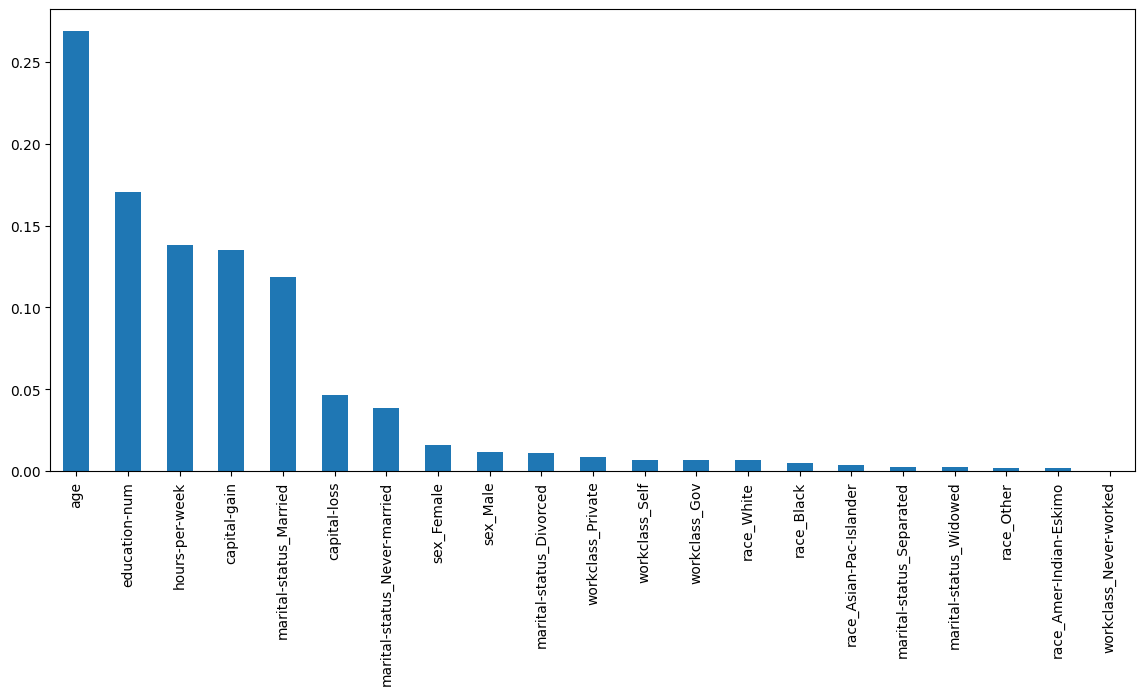

In [74]:
# Print feature importance
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))  

In [75]:
# K-fold cross validation for different numbers of features to consider at each split
for i in range (2,7):                                                                  
    model = RandomForestClassifier(random_state=0,max_features=i)
    scores = cross_validate(model, X, y, scoring='precision',cv=5)
    print(i,':',np.average(scores['test_score']))

2 : 0.8738902948089529
3 : 0.8745517234722329
4 : 0.8740672899701958
5 : 0.8749115699685532
6 : 0.8763021880728278


While max_features=6 provides a marginally higher precision score, choosing max_features=2 is likely a safer choice due to the slightly better cross-validation performance and lower risk of overfitting. If your goal is solely to maximize precision and you are okay with the risk of overfitting, you could choose max_features=6. However, if you’re aiming for a robust model, max_features=2 might be preferable.

In [84]:
#make predictions with 3 
rf = RandomForestClassifier(random_state=0,max_features=3)
model_rf= rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(x)
print(y_pred_rf)

[1 1 1 1 1]


In [79]:
### Internal way of doing cross-validation with only accuracy scores ###
# Cross-validate internally using OOB observations
rf2 = RandomForestClassifier(random_state=0,oob_score=True)   
model_rf2 = rf2.fit(X, y)
model_rf2.oob_score_

0.8333757205832486

## Gradient Boosting

In [82]:
# Build the model
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=0)
model_gbt = gbt.fit(X_train, y_train)
y_test_pred = model_gbt.predict(X_test)
precision_gbt = precision_score(y_test, y_test_pred)
precision_gbt

np.float64(0.8714620797498045)

In [83]:
# K-fold cross-validation with different number of samples required to split

for i in range(2,10):
    model = GradientBoostingClassifier(random_state=0,min_samples_split=i) # min_sample_split could be adjusted by needs
    scores = cross_validate(model, X, y, scoring='precision', cv=5)
    print(i,':',np.average(scores['test_score']))

2 : 0.8723904467647703
3 : 0.8725142516169402
4 : 0.8722669922880113
5 : 0.8722669922880113
6 : 0.8721479354099497
7 : 0.8721916501579509
8 : 0.872319660453764
9 : 0.8720842539026321


In [85]:
#make predictions with 3 
model = GradientBoostingClassifier(random_state=0,min_samples_split=3)
model_gbt= model.fit(X_train, y_train)
y_pred_gbt = model_gbt.predict(x)
print(y_pred_gbt)

[1 1 1 1 1]


## conclusion
Three methods have the same prediction result of new sample. but they have different pro and cons. 

decision tree: interpretability very good/(path+ feature importance), accuracy low and easy to be overfitting

random forest: interpretability moderate (feature importance), accuracy high, more generalized and robust model

gradient descent: bad interpretability, accuracy very high( as it directly boost the model performance by min the residual value), high overfitting issue, need extensive tuning.

